# Module: Machine Learning and Statistics


### Lecturer: Ian Mcloughlin
### Student: Freha Saleem

## Project-2020

## Introduction:
The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values.
The model will be based on the powerprediction dataset.<br/>
In this Jupyter notebook we explore the given data set and  train a model using that dataset, explain the model and give an analysis of its accuracy.

####  PowerPrediction Data Set
This has 500 rows of data. It has two columns, one is wind speed and other is power produced.

### Import the packages

In [59]:
# import seaborn 
import seaborn as sns
# Seaborn is a library for making statistical graphics in Python
#It is built on top of matplotlib and closely integrated with pandas data structures.
# For data frames.
import pandas as pd

# For numerical arrays.
import numpy as np

#For curve fit
from scipy.optimize import curve_fit

# For evaluating models.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# For saving/restoring models using pickle
import joblib

%matplotlib inline 
# https://stackoverflow.com/a/43028105 to fix the graph 
# import matplotlib
import matplotlib.pyplot as plt
#Matplotlib is a Python 2D plotting library 
#which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [60]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [10, 8]

### Load Dataset

In [205]:
# save the dataset as Dataframe
df = pd.read_csv("./powerproduction.csv")
df2=df

### Exploratory Data Analysis(EDA)
EDA is an analysis approach that focuses on identifying general patterns in the data and finding previously unknown relationships.

In [62]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [63]:
#The number of rows and columns in dataset
df.shape 

(500, 2)

In [64]:
# The names of the columns
df.columns

Index(['speed', 'power'], dtype='object')

In [65]:
# to check for any missing or null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Statistical Summary of Dataset

In [66]:
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


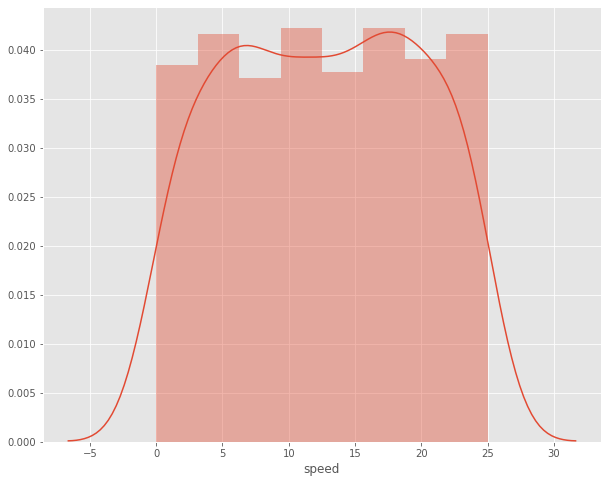

In [67]:
#Look at the distribution of the speed data
sns.distplot(df['speed'])

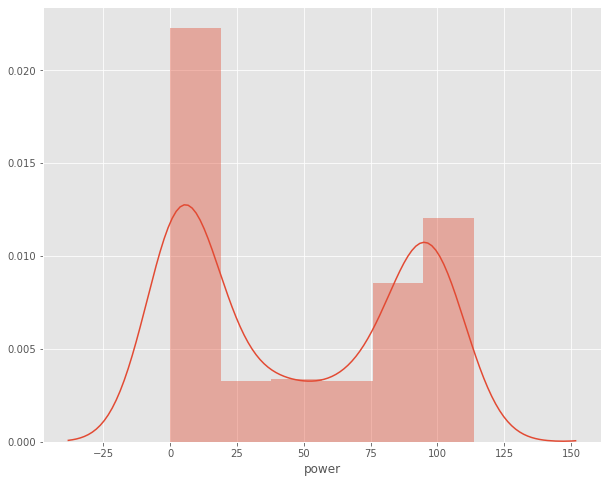

In [68]:
#Look at the distribution of Power
sns.distplot(df['power'])

## Scatter Plot

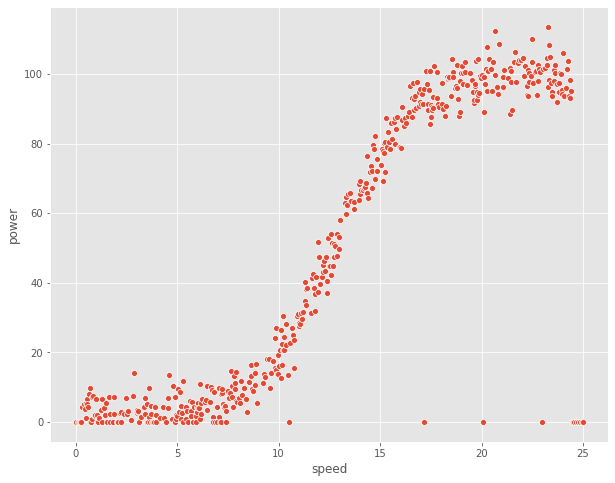

In [69]:
# use a scatter plot to to observe relationship between variable(power,speed) 
sns.scatterplot(x='speed',y='power',data = df)

There is a relationship between speed and power. There are a few outliers in data as well.

## Power Curve
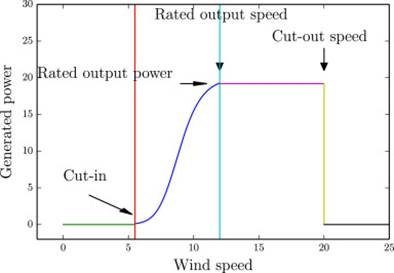

A wind turbine is characterised by a power curve representing the relation between wind speed and the amount of electrical power that is generated. This depends on several limits. For example, when the wind speed is lower than the cut-in speed, there is not enough power to rotate the blades of the wind turbine and therefore no electricity is generated. As soon as the wind speed is high enough, electrical power will be generated, and the amount of energy is cubically dependent on the wind speed and linearly dependent on the surface of the rotating blades. A small change in wind speed will therefore have a great impact on the energy output. source:http://owi-lab.com/content/modelling-power-curves-offshore-wind-turbines-machine-learning

- cut in speed -- is the speed where turbine start producing power
- cut out speed --is where wind speed is so high that wind turbine need to be stopped.

## Linear Regression

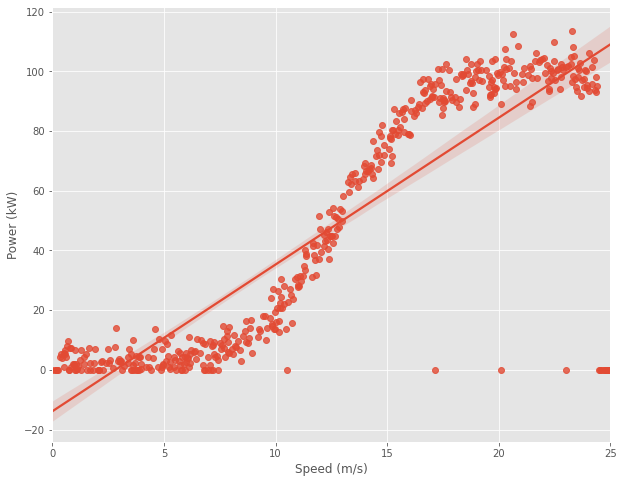

In [70]:
#regression plot
sns.regplot(x='speed',y='power',data = df)
plt.xlabel("Speed (m/s)")
plt.ylabel("Power (kW)")
plt.show()

#### Outliers
From the above graph it is apparent that there are some outliers.<br>
Wikipedia definition,<br>
In statistics, an outlier is an observation point that is distant from other observations.

In [71]:
#save the orignal data in df2
df2=df
# Look at the Speed values where power generated is 0
print (df[df.power == 0])
df2= df[df.power == 0]
df2.count()

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    49
power    49
dtype: int64

In [72]:
df.isin([0]).sum()

speed     1
power    49
dtype: int64

#### There are 49 rows where power is 0 and it is on both low wind speed and high wind speed

### Remove the outliers

In [73]:
#drop the rows where power is 0 to remove outliers
index = df[(df['power'] == 0)].index
df.drop(index, inplace=True)

In [74]:

df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


### Cut in Speed

In [75]:
print("Cut in Speed:the minimum wind speed at which turbine start generating Power  ",df.speed.min())

Cut in Speed:the minimum wind speed at which turbine start generating Power   0.325


### Cut-out Speed

In [76]:
# Cut ou Speed
print("Cut out Speed:the maximum wind speed at which turbine generate power  ",df.speed.max())

Cut out Speed:the maximum wind speed at which turbine generate power   24.399


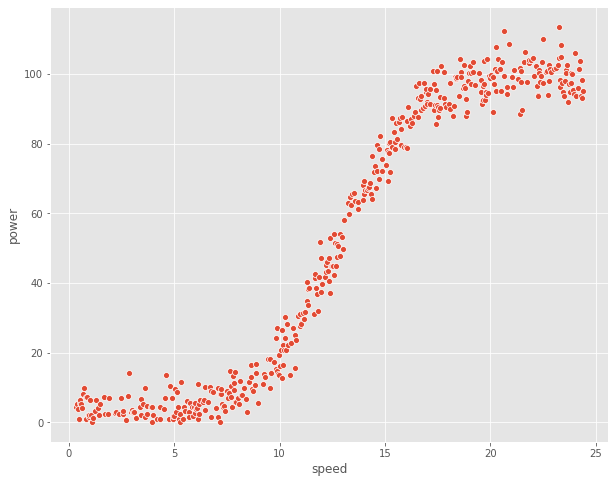

In [77]:
#graph after removing outliers
sns.scatterplot(x='speed',y='power',data = df)

As we look at the regplot it is obvious that the linear regression does not fit the data.

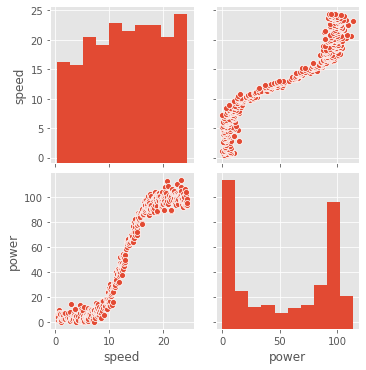

In [78]:
sns.pairplot(df)
plt.show()

## Fitting a Curve

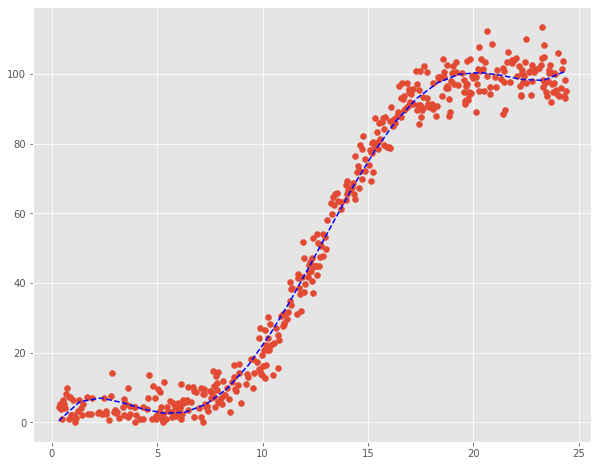

In [79]:
#
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 

# choose the input and output variables
x, y = df['speed'], df['power']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='blue')
pyplot.show()
# code adopted from https://machinelearningmastery.com/curve-fitting-with-python/

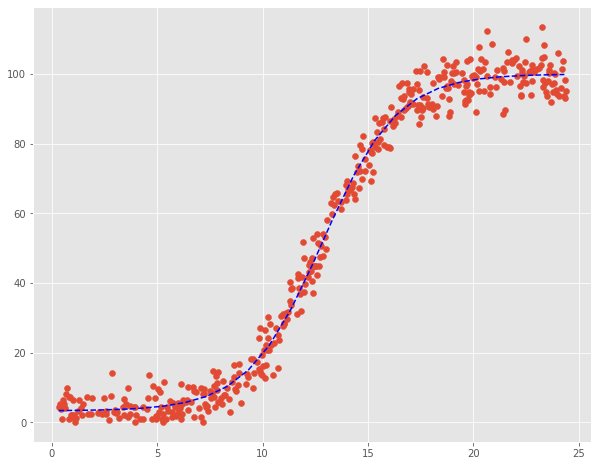

In [80]:
from scipy.optimize import curve_fit
xdata=df['speed']
ydata=df['power']
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0,method='dogbox')
plt.scatter(xdata, ydata)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(xdata), max(xdata), 1)
# calculate the output for the range
y_line = sigmoid(x_line, *popt)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='blue')
plt.show()
# code adopted from https://stackoverflow.com/a/62215374

## 1. Polynomial Regression Model

In [81]:
#For Polynomial Regression Model

# For linear Regression
from sklearn.linear_model import LinearRegression

# For generating polynomial features in the data.
from sklearn.preprocessing import PolynomialFeatures

# For splitting data into train/test sets
from sklearn.model_selection import train_test_split

# For evaluating model.
from sklearn.metrics import mean_squared_error, r2_score


In [258]:
#polynomial regression

index = df[(df['power'] == 0)].index
df.drop(index, inplace=True)

X=df[['speed']]
y=df['power']

In [259]:
#split the date 80% training and 20%testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [84]:
# use 3 degree 
poly_reg = PolynomialFeatures(degree = 3, include_bias=False)

X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
#train the model
lin_reg.fit(X_poly, y_train)

LinearRegression()

### Predicting the Results
In this step, we are going to predict the values Salary based on the Polynomial Regression model built. The “regressor.predict” function is used to predict the values for our independent variable, X_poly. We assign the predicted values as y_pred. We now have two data, y(real values) and y_pred (predicted values).

In [85]:
X_polytest = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polytest)
print(y_pred)

[ 37.01456957 101.51822763 102.11661457  -0.13894059  64.83027498
  49.18678426  12.9212243   99.77061358  90.42900052   6.98762477
   5.09445018  32.56190923  25.28392815  51.51622583  47.79560438
  99.56972126   6.7075035   98.73560232   9.81862007  56.84059756
  45.01922926  97.60618635 101.68976597  43.40551805   1.07087866
  -2.53882969  -1.22391139  63.47850173  93.48059114   4.09839317
  34.55219969  11.91312122  -0.66784401  54.29812948  -0.46890276
  -1.49779609   9.35339426   5.62132364  41.56864755 101.37729681
  -2.68980042  75.47876568  17.0171438   67.95811332 102.50628437
 101.85502978 101.83421207  17.76226427  99.20828619  52.67599665
 101.90649188  52.90786371 104.009566     9.97523651  87.58608207
  21.22830904  41.79776285   1.654146    41.11087887   0.52765865
  97.16870502  38.82320837  48.95483753 103.1603804   13.87029073
  81.71165077  85.46042888  16.28169434  69.49651086   4.61739255
   1.16665587   6.02214078  50.12405619  14.83370301  10.76970247
  76.93302

In [86]:
#compare real value with predicted
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'difference':y_test-y_pred})
df

,Real Values,Predicted Values,difference
220,29.601,37.014570,-7.413570
452,102.544,101.518228,1.025772
400,94.489,102.116615,-7.627615
106,6.184,-0.138941,6.322941
277,67.263,64.830275,2.432725
...,...,...,...
84,3.934,-2.504565,6.438565
427,100.937,104.030607,-3.093607
444,97.803,102.780896,-4.977896
329,93.698,85.641125,8.056875


### Visualising the Polynomial Regression results
In this last step, we shall visualize the polynomial model that was built using the given data and plot the values of “y” and “y_pred” on the graph and analyze the results

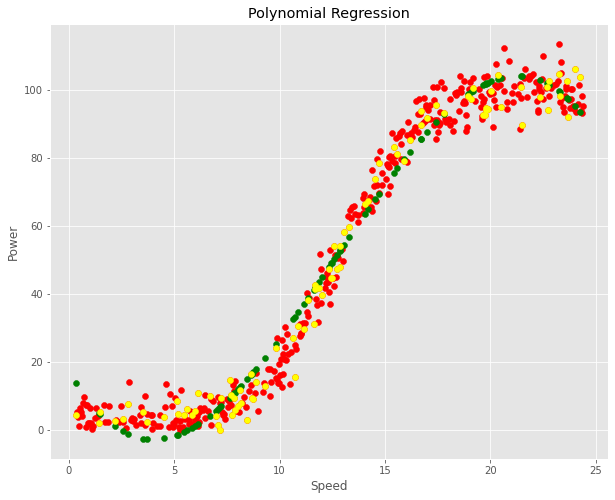

In [87]:
import numpy as np
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.scatter(X_test, y_test, color = 'yellow')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

### Model Accuracy

In [88]:
# Mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')

# Coefficient of determination
print(f'Coefficient of determination: {r2_score(y_test, y_pred):.2f}')

Mean squared error: 35.82
Coefficient of determination: 0.98


#### Change to 5 degrees to see the difference

In [201]:
poly_reg4 = PolynomialFeatures(degree = 5, include_bias=False)# change degree
X_poly4 = poly_reg4.fit_transform(X_train)
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly4, y_train)
X_polytest4 = poly_reg4.fit_transform(X_test)
y_pred4 = lin_reg4.predict(X_polytest4)

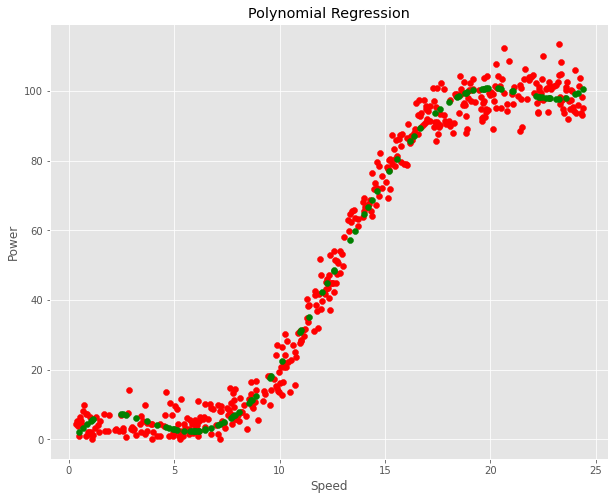

In [202]:
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred4, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

### Model Accuracy

In [210]:
# Mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_pred4):.2f}')

# Coefficient of determination
print(f'R Score: {r2_score(y_test, y_pred4):.2f}')

Mean squared error: 19.49
R Score: 0.99


### Save the model using joblib


In [92]:
import joblib 
  
# Save the model as a pickle in a file 
#joblib.dump(lin_reg, 'poly_reg.pkl') 

# Save the model as a pickle in a file 
joblib.dump(lin_reg4, 'models/poly_reg5.pkl') 

['models/poly_reg5.pkl']

## 2. Neural Networks Model

**Models in Keras are defined as a sequence of layers.**

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to number of input variables.

Selection of the number of layers and their types is hard. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.


In [168]:
# For Neural Networks import keras
import tensorflow.keras as kr

In [169]:
#have a copy of data
data=df


In [170]:
# first neural network with keras

#import tensorflow as tf
# Create a Sequential model 
# kernel_initializer="glorot_uniform"
model = kr.models.Sequential()
# Add 1st Hidden layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform"))
# 2nd Hidden layer
model.add(kr.layers.Dense(40, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# 3rd Hidden layer
model.add(kr.layers.Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Output layer
model.add(kr.layers.Dense(1, activation="linear", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

### Compile Keras Model
Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use for evaluating a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.
We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results with a wide range of problems. 

In [171]:
# compiling the model
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_29 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_30 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [172]:
#X=data[['speed']]
#y=data['power']
#split the date 80% training and 20%testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##  Fit Keras Model
after compiling model is ready for efficient computation.

Now it is time to execute the model on test data.

Training occurs over epochs and each epoch is split into batches.
**Epoch:** One pass through all of the rows in the training dataset.
**Batch:** One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

*Training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.**


In [173]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=10)


Epoch 1/500
36/36 [==============================] - 1s 2ms/step - loss: 4106.5615
Epoch 2/500
36/36 [==============================] - 0s 1ms/step - loss: 4135.8549
Epoch 3/500
36/36 [==============================] - 0s 1ms/step - loss: 3844.4861
Epoch 4/500
36/36 [==============================] - 0s 2ms/step - loss: 3693.4359
Epoch 5/500
36/36 [==============================] - 0s 1ms/step - loss: 4024.9210
Epoch 6/500
36/36 [==============================] - 0s 1ms/step - loss: 3792.9427
Epoch 7/500
36/36 [==============================] - 0s 2ms/step - loss: 3722.4365
Epoch 8/500
36/36 [==============================] - 0s 2ms/step - loss: 3430.9010
Epoch 9/500
36/36 [==============================] - 0s 2ms/step - loss: 3647.3812
Epoch 10/500
36/36 [==============================] - 0s 2ms/step - loss: 3186.9202
Epoch 11/500
36/36 [==============================] - 0s 2ms/step - loss: 3154.4779
Epoch 12/500
36/36 [==============================] - 0s 2ms/step - loss: 3369.9307
E

36/36 [==============================] - 0s 2ms/step - loss: 94.0499
Epoch 196/500
36/36 [==============================] - 0s 2ms/step - loss: 91.8698
Epoch 197/500
36/36 [==============================] - 0s 1ms/step - loss: 91.2942
Epoch 198/500
36/36 [==============================] - 0s 2ms/step - loss: 104.4246
Epoch 199/500
36/36 [==============================] - 0s 1ms/step - loss: 98.3420
Epoch 200/500
36/36 [==============================] - 0s 1ms/step - loss: 80.6387
Epoch 201/500
36/36 [==============================] - 0s 1ms/step - loss: 87.1449
Epoch 202/500
36/36 [==============================] - 0s 1ms/step - loss: 86.6849
Epoch 203/500
36/36 [==============================] - 0s 1ms/step - loss: 84.8521
Epoch 204/500
36/36 [==============================] - 0s 2ms/step - loss: 76.5281
Epoch 205/500
36/36 [==============================] - 0s 2ms/step - loss: 64.2482
Epoch 206/500
36/36 [==============================] - 0s 1ms/step - loss: 70.8983
Epoch 207/500
36/

36/36 [==============================] - 0s 2ms/step - loss: 18.6644
Epoch 392/500
36/36 [==============================] - 0s 2ms/step - loss: 19.7951
Epoch 393/500
36/36 [==============================] - ETA: 0s - loss: 11.87 - 0s 1ms/step - loss: 16.2276
Epoch 394/500
36/36 [==============================] - 0s 1ms/step - loss: 18.0272
Epoch 395/500
36/36 [==============================] - 0s 2ms/step - loss: 16.4126
Epoch 396/500
36/36 [==============================] - 0s 1ms/step - loss: 18.4836
Epoch 397/500
36/36 [==============================] - 0s 1ms/step - loss: 16.5646
Epoch 398/500
36/36 [==============================] - 0s 1ms/step - loss: 16.7614
Epoch 399/500
36/36 [==============================] - 0s 1ms/step - loss: 15.4341
Epoch 400/500
36/36 [==============================] - 0s 2ms/step - loss: 16.1590
Epoch 401/500
36/36 [==============================] - 0s 2ms/step - loss: 16.8621
Epoch 402/500
36/36 [==============================] - 0s 1ms/step - loss: 15

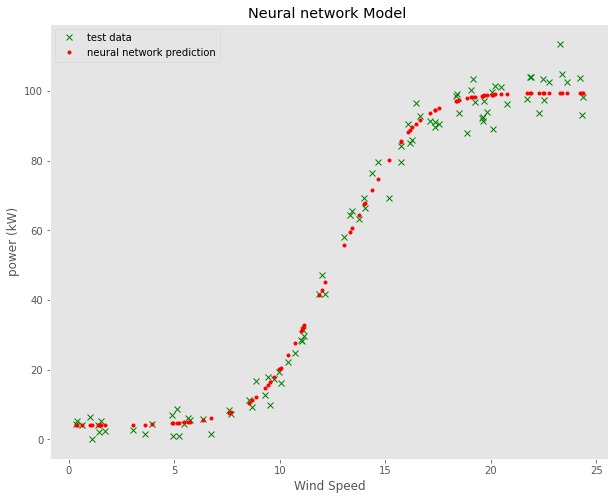

In [174]:
# Look at prediction for the test data
plt.plot(X_test, y_test, 'gx', label="test data")
plt.plot(X_test, model.predict(X_test), 'r.', label="neural network prediction")
plt.xlabel('Wind Speed')
plt.ylabel('power (kW)')
plt.title("Neural network Model ")
plt.grid()
plt.legend()
plt.show()

### Evaluate Keras Model
 Evaluate the performance of the network on the test dataset.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.



In [175]:
...
# evaluate the model
loss= model.evaluate(X_test, y_test)
print('loss: %.2f' % (loss))
#print('accuracy: %.2f' % (accuracy))

3/3 [==============================] - 0s 2ms/step - loss: 16.5694
loss: 16.57


In [178]:
predictions = model.predict(X_test)
# summarize the first 5 cases
#results=pd.DataFrame(columns=['wind speed','predicted power','actual value'])
df = pd.DataFrame(X_test)
df['predicted power']=predictions
df['actual value']=y_test
#results['wind speed']=pd.Series()
#results['predicted power']=predictions
#results['actual value']=y_test
#results
df


,speed,predicted power,actual value
68,3.604,4.257086,1.535
182,9.309,14.778610,12.881
109,5.731,5.040089,5.631
266,13.438,60.810131,65.605
390,19.595,98.638687,92.203
...,...,...,...
398,19.820,98.782837,94.071
77,3.929,4.314122,4.415
343,17.342,94.457916,89.613
448,22.523,99.390152,97.256


In [179]:
#model.save("models/neural_model.h5")
print("Neural network model saved as neural_model.h5")

Neural network model saved as neural_model.h5


In [212]:
# use standarised data for Neural network mode
# convert the array shape and unify the lengths
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
model2 = kr.models.Sequential()
# Add 1st Hidden layer
model2.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform"))
# 2nd Hidden layer
model2.add(kr.layers.Dense(40, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# 3rd Hidden layer
model2.add(kr.layers.Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Output layer
model2.add(kr.layers.Dense(1, activation="linear", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))


In [214]:
# compiling the model
model2.compile('adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_33 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_34 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


## Feature Scaling

In [237]:
from sklearn.preprocessing import MinMaxScaler
# data standardization with  sklearn
#from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['speed']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [249]:
#fit the model
# fit the keras model on the dataset
model2.fit(X_train_stand, y_train, epochs=500, batch_size=10)

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7345
Epoch 2/500
36/36 [==============================] - 0s 2ms/step - loss: 15.8409
Epoch 3/500
36/36 [==============================] - ETA: 0s - loss: 16.58 - 0s 2ms/step - loss: 15.5708
Epoch 4/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5863
Epoch 5/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7481
Epoch 6/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5208
Epoch 7/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6126
Epoch 8/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7867
Epoch 9/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7597
Epoch 10/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6218
Epoch 11/500
36/36 [==============================] - 0s 2ms/step - loss: 15.8759
Epoch 12/500
36/36 [==============================] - 0s 2ms/step - loss: 15.8959
E

36/36 [==============================] - 0s 2ms/step - loss: 15.5800
Epoch 199/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6160
Epoch 200/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5719
Epoch 201/500
36/36 [==============================] - 0s 2ms/step - loss: 15.3713
Epoch 202/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5044
Epoch 203/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7705
Epoch 204/500
36/36 [==============================] - 0s 2ms/step - loss: 15.9142
Epoch 205/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6002
Epoch 206/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5657
Epoch 207/500
36/36 [==============================] - 0s 2ms/step - loss: 15.8318
Epoch 208/500
36/36 [==============================] - 0s 2ms/step - loss: 15.9609
Epoch 209/500
36/36 [==============================] - 0s 2ms/step - loss: 16.0869
Epoch 210/500
36/3

36/36 [==============================] - 0s 2ms/step - loss: 15.5958
Epoch 395/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7012
Epoch 396/500
36/36 [==============================] - 0s 2ms/step - loss: 15.4861
Epoch 397/500
36/36 [==============================] - 0s 2ms/step - loss: 15.4331
Epoch 398/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6509
Epoch 399/500
36/36 [==============================] - 0s 3ms/step - loss: 15.5595
Epoch 400/500
36/36 [==============================] - 0s 2ms/step - loss: 15.4400
Epoch 401/500
36/36 [==============================] - 0s 2ms/step - loss: 15.7202
Epoch 402/500
36/36 [==============================] - 0s 2ms/step - loss: 15.4584
Epoch 403/500
36/36 [==============================] - 0s 2ms/step - loss: 15.5283
Epoch 404/500
36/36 [==============================] - 0s 2ms/step - loss: 15.6772
Epoch 405/500
36/36 [==============================] - 0s 2ms/step - loss: 15.8205
Epoch 406/500
36/3

In [250]:
# convert the array shape and unify the lengths
#X_test = X_test.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)


In [251]:
# evaluate the model
 
print('loss: %.2f' % (model2.evaluate(X_test_stand, y_test)))

3/3 [==============================] - 0s 4ms/step - loss: 19.0939
loss: 19.09


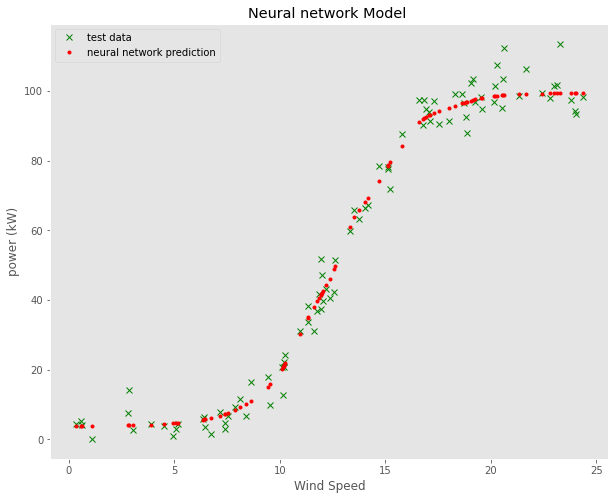

In [252]:
# Look at prediction for the test data
plt.plot(X_test, y_test, 'gx', label="test data")
plt.plot(X_test, model2.predict(X_test_stand), 'r.', label="neural network prediction")
plt.xlabel('Wind Speed')
plt.ylabel('power (kW)')
plt.title("Neural network Model ")
plt.grid()
plt.legend()
plt.show()

In [253]:
...
# evaluate the model
loss= model.evaluate(X_test, y_test)
print('loss: %.2f' % (loss))

3/3 [==============================] - 0s 2ms/step - loss: 19.6800
loss: 19.68


## 3. Random Forest Model
The random forest is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [260]:
# For Random Forest Model.
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [261]:
#create a Model
reg2 = RandomForestRegressor(random_state=1)
# train the model with training data
reg2.fit(X_train, y_train)
#predict the values using test data
pred2 = reg2.predict(X_test)

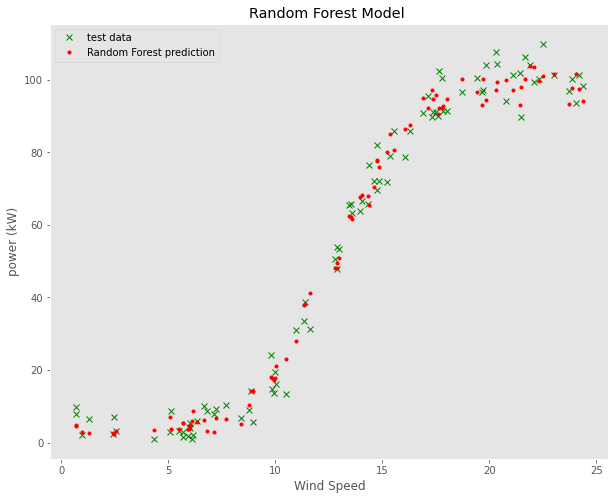

In [262]:
# Look at prediction for the test data
plt.plot(X_test, y_test, 'gx', label="test data")
plt.plot(X_test, reg2.predict(X_test), 'r.', label="Random Forest prediction")
plt.xlabel('Wind Speed')
plt.ylabel('power (kW)')
plt.title("Random Forest Model ")
plt.grid()
plt.legend()
plt.show()

In [263]:
#X_train = X_train.values.reshape(-1, 1) 
#y_train = y_train.values
# X_test = X_test.values.reshape(-1, 1)
# Mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, pred2):.2f}')

# Coefficient of determination
#R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
print(f'R Score: {r2_score(y_test, pred2):.2f}')

Mean squared error: 24.43
R Score: 0.98


In [264]:
# K fold cross validation  for random forest regressor
# i
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [192]:
rmodel=rfr_model(X_train,y_train)
rmodel

array([-3.98881067, -3.22837816, -3.30893822, -3.87021137, -3.69388571,
       -2.78232429, -3.4465287 , -3.39940567, -2.84810331, -3.4886091 ])

### Save Model

In [204]:
joblib.dump(reg2, 'models/randomF_model.pkl') 

['models/randomF_model.pkl']

# Conclusion
The goal of this project was the prediction of power output in relation to wind speed. The provided data set is about wind turbine power generation and wind speed. As we plot a graph it resembles the power curve. There are cut in and cut out speed limits, so we check the data for zero power values and decide to drop down that data.<br/>
After preprocessing (cleaning). It comes to select the suitable machine learning model.
I decided to use polynomial regression (degree=3 and degree=5) when I plotted the results it was a straight line fit. Next I decided to try the Neural Network Model. When I plotted the results of this model it looked better than the Polynomial model. I came across the idea of feature scaling. I found it extremely interesting and decided to see how quick the model converges if standardised data is used.<br/>
The third model I used was the Random Forest Model and it gave good results as well.
This was an interesting project I have looked at three different machine learning models, understood their workings and concepts. 

In [ ]:
#for using virtual env
#python -m venv --system-site-packages .\venv
#.\venv\Scripts\activate

# References

1. What is the Sigmoid Function? https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function#:~:text=One%20of%20the%20most%20widely,range%20(0%2C%201).&text=A%20sigmoid%20function%20placed%20as,to%20work%20with%20and%20interpret. accessed on 07/12/202
2. Ways to Detect and Remove the Outliers https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba accessed 19/11/2020
3. Understanding Non-Linear Regression available online from https://medium.com/towards-artificial-intelligence/understanding-non-linear-regression-fbef9a396b71 accessed on 22/12/2020
4. Machine Learning Basics: Polynomial Regression https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1 accessed on 23/12/2020
5. https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226 accessed on 01/01/2020
6. Modelling power curves of offshore wind turbines with machine learning http://owi-lab.com/content/modelling-power-curves-offshore-wind-turbines-machine-learning accessed on 02/01/2020
7. Understanding Random Forest https://towardsdatascience.com/understanding-random-forest-58381e0602d2  accessed on 27/12/2020
8. Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ accessed on 28/12/2020
9. https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79 https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79 accessed on 03/01/2020
10. How to use Data Scaling Improve Deep Learning Model Stability and Performance https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ accessed on 05/01/2020
11. How to Use StandardScaler and MinMaxScaler Transforms in Python https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/accessed on 05/01/2020